In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import time
import os

In [108]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from fbprophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [110]:
df = pd.read_json('./data.json')
df['day_of_month'] = pd.DatetimeIndex(df['date']).day
df['day_of_week'] = pd.DatetimeIndex(df['date']).dayofweek
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['month'] = pd.DatetimeIndex(df['date']).month
df['quarter'] = pd.DatetimeIndex(df['date']).month // 3 + 1
df['year'] = pd.DatetimeIndex(df['date']).year
df['ds'] = pd.DatetimeIndex(df['date'])
df['y'] = pd.DatetimeIndex(df['worth'])

# df.set_index('date')

# df['date'] = pd.DatetimeIndex(df['date']).to_datetime()
df.info()
df.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          458 non-null    datetime64[ns]
 1   worth         458 non-null    float64       
 2   day_of_month  458 non-null    int64         
 3   day_of_week   458 non-null    int64         
 4   day_of_year   458 non-null    int64         
 5   month         458 non-null    int64         
 6   quarter       458 non-null    int64         
 7   year          458 non-null    int64         
 8   ds            458 non-null    datetime64[ns]
 9   y             458 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(6)
memory usage: 35.9 KB


RangeIndex(start=0, stop=458, step=1)

In [115]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
818,2021-07-29,113564.194879,109833.457904,117051.491872
819,2021-07-30,113145.188620,109718.743737,116590.455134
820,2021-07-31,112636.809092,109007.014244,116185.984402
821,2021-08-01,111996.142604,108472.617593,115356.395256
822,2021-08-02,111101.724706,107541.025577,114842.168547


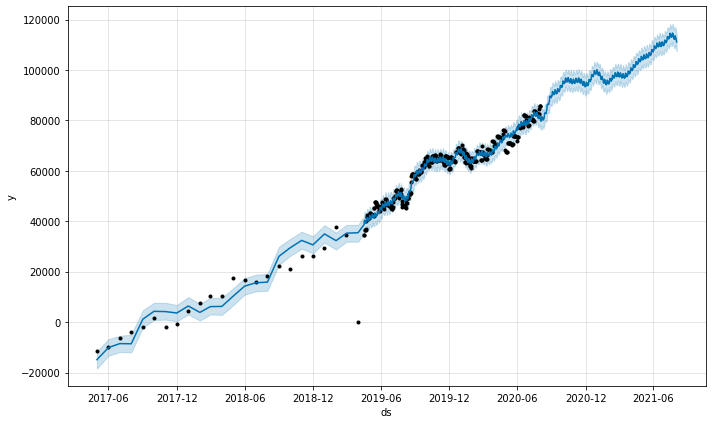

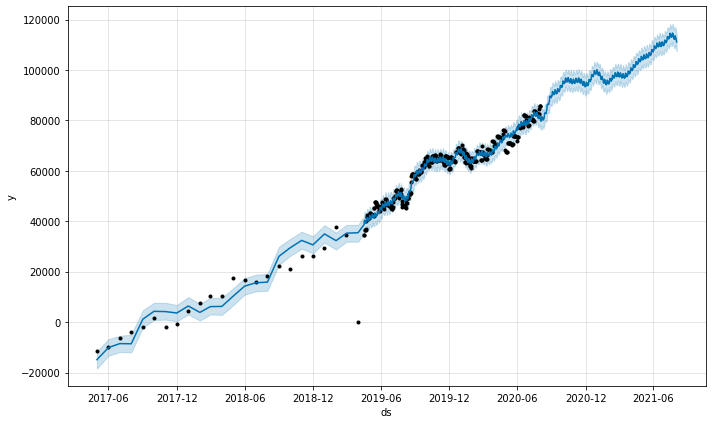

In [117]:
m.plot(forecast)

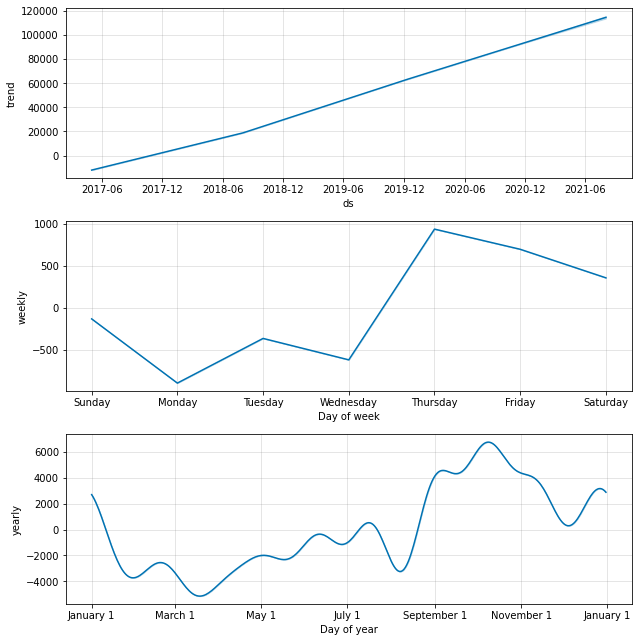

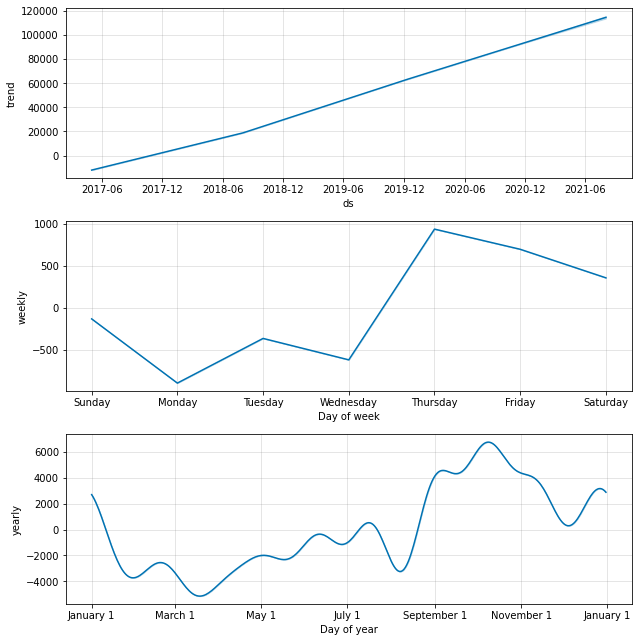

In [118]:
m.plot_components(forecast)